<a href="https://colab.research.google.com/github/sagarbhalke888/Computer-Vision-Project/blob/main/basic_yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
# make sure you use Tesla K80 GPU (12GB), by changing 'runtmie type' 

!nvidia-smi


In [ ]:
#clone darknet repository 
import os
os.environ['PATH'] += ':/usr/local/cuda/bin'
!rm -fr darknet
!git clone https://github.com/AlexeyAB/darknet/

In [ ]:
!apt install gcc-5 g++-5 -y
!ln -s /usr/bin/gcc-5 /usr/local/cuda/bin/gcc 
!ln -s /usr/bin/g++-5 /usr/local/cuda/bin/g++

In [ ]:
# go to the darknet folder, enable GPU, then compile the entire thing
%cd darknet
!sed -i 's/GPU=0/GPU=1/g' Makefile
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!make

In [ ]:
# get yolov3 weights
!wget https://pjreddie.com/media/files/yolov3.weights
!chmod a+x ./darknet


In [ ]:
!pwd

In [ ]:
!apt install ffmpeg libopencv-dev libgtk-3-dev python-numpy python3-numpy libdc1394-22 libdc1394-22-dev libjpeg-dev libtiff5-dev libavcodec-dev libavformat-dev libswscale-dev libxine2-dev libgstreamer1.0-dev libgstreamer-plugins-base1.0-dev libv4l-dev libtbb-dev qtbase5-dev libfaac-dev libmp3lame-dev libopencore-amrnb-dev libopencore-amrwb-dev libtheora-dev libvorbis-dev libxvidcore-dev x264 v4l-utils unzip

In [10]:
from google.colab import files

In [11]:
uploaded = files.upload()

Saving FAST AND FURIOUS 9 Trailer (2020).mp4 to FAST AND FURIOUS 9 Trailer (2020).mp4


In [12]:
!pwd

/content/darknet


In [14]:
#output_video_name = "doggie.mp4"
#%cd ..
!./darknet detector demo cfg/coco.data cfg/yolov3.cfg yolov3.weights -dont_show doggy.mp4 -i 0 -out_filename out1.avi -thresh 0.3


Streaming output truncated to the last 5000 lines.
FPS:33.2 	 AVG_FPS:33.0

 cvWriteFrame 
Objects:


FPS:33.1 	 AVG_FPS:33.0

 cvWriteFrame 
Objects:


FPS:33.1 	 AVG_FPS:33.0

 cvWriteFrame 
Objects:


FPS:33.2 	 AVG_FPS:33.0

 cvWriteFrame 
Objects:


FPS:33.1 	 AVG_FPS:33.0

 cvWriteFrame 
Objects:


FPS:33.0 	 AVG_FPS:33.0

 cvWriteFrame 
Objects:


FPS:33.0 	 AVG_FPS:33.0

 cvWriteFrame 
Objects:


FPS:32.9 	 AVG_FPS:33.0

 cvWriteFrame 
Objects:


FPS:33.0 	 AVG_FPS:33.0

 cvWriteFrame 
Objects:


FPS:33.0 	 AVG_FPS:33.0

 cvWriteFrame 
Objects:


FPS:33.0 	 AVG_FPS:33.0

 cvWriteFrame 
Objects:


FPS:32.6 	 AVG_FPS:33.0

 cvWriteFrame 
Objects:


FPS:32.7 	 AVG_FPS:33.0

 cvWriteFrame 
Objects:


FPS:32.6 	 AVG_FPS:33.0

 cvWriteFrame 
Objects:


FPS:32.5 	 AVG_FPS:33.0

 cvWriteFrame 
Objects:


FPS:32.4 	 AVG_FPS:33.0

 cvWriteFrame 
Objects:


FPS:32.7 	 AVG_FPS:33.0

 cvWriteFrame 
Objects:


FPS:32.7 	 AVG_FPS:33.0

 cvWriteFrame 
Objects:


FPS:32.9 	 AVG_FPS:33.0

 cvWri

In [ ]:
#examole of image detection so-called 'easy-one'
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg 

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


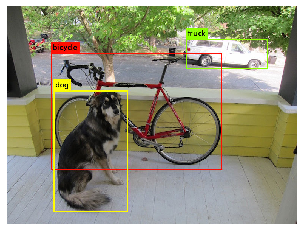

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os.path

fig,ax = plt.subplots()
ax.tick_params(labelbottom="off",bottom="off")
ax.tick_params(labelleft="off",left="off")
ax.set_xticklabels([]) 
ax.axis('off')

file = './predictions.jpg'
if os.path.exists(file):
  img = cv2.imread(file)
  show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
  plt.imshow(show_img)